#Resumen capitulo 4: Training Models.
 

Hasta ahora hemos tratado los modelos de aprendizaje automático y sus algoritmos de entrenamiento principalmente como cajas negras. 

Entender bien cómo funcionan las cosas puede ayudarle a encontrar rápidamente el modelo adecuado, el algoritmo de entrenamiento correcto y un buen conjunto de hiperparámetros para su tarea. Entender lo que hay bajo el capó también le ayudará a depurar los problemas y a realizar un análisis de errores de forma más eficiente. Por último, la mayoría de los temas discutidos en este capítulo serán esenciales para entender, construir y entrenar redes neuronales (discutido en la Parte II de este libro).

En este capítulo comenzaremos viendo el modelo de Regresión Lineal, uno de los modelos más simples que existen. Discutiremos dos formas muy diferentes de entrenarlo:

* Utilizando una ecuación directa de "forma cerrada" que calcula directamente los parámetros del modelo que mejor se ajustan al conjunto de entrenamiento (es decir, los parámetros del modelo que minimizan la función de coste sobre el conjunto de entrenamiento).

* Utilizar un enfoque de optimización iterativo llamado Gradient Descent (GD) que ajusta gradualmente los parámetros del modelo para minimizar la función de coste sobre el conjunto de entrenamiento, convergiendo finalmente al mismo conjunto de parámetros que el primer método. Veremos unas cuantas variantes de Gradient Descent que utilizaremos en la Parte II

A continuación veremos la Regresión Polinómica, un modelo más complejo que puede ajustarse a conjuntos de datos no lineales. Dado que este modelo tiene más parámetros que la regresión lineal, es más propenso a sobreajustar los datos de entrenamiento, por lo que veremos cómo detectar si este es el caso utilizando curvas de aprendizaje, y luego veremos varias técnicas de regularización que pueden reducir el riesgo de sobreajuste del conjunto de entrenamiento.

Por último, estudiaremos otros dos modelos que se utilizan habitualmente para tareas de clasificación: La Regresión Logística y la Regresión Softmax.

WARNING

En este capítulo habrá bastantes ecuaciones matemática.Si no estás familiarizado con estos conceptos, por favor, repasa los tutoriales de introducción al álgebra lineal y al cálculo disponibles como cuadernos Jupyter en el material complementario online. https://github.com/ageron/handson-ml2


## Linear Regression
En el capitulo 1 trabajamos con la regresión lineal para modelar la satisfaccion de un pais, la cual tenia la siguiente forma:  
$$
\text{life_satisfaction}  = θ_{0} + θ_{1} \times \text{GDP_per_capita}
$$
Donde $θ_{0} + θ_{1}$ son los parametros del modelo.En este caso solo estabamos trabajando con dos parametros, pero si queremos trabajar con más paramtros se hace necesario conocer la forma generalizada de la regresión: 
$$
\hat{y} = θ_{0} + θ_{1}x_1 +  θ_{2}x_2+ ⋯ +  θ_{n}x_n
$$

Donde:
* ŷ es el valor predicho.
* n es el número de características.
* x es el valor de la característica i.
* θ es el parámetro j del modelo (incluyendo el término de sesgo $θ_0$ y las pesos de las características $θ_1 , θ_2 , ⋯, θ_n $).

Ocupando notación vectorial, queda de la siguiente manera: 
$$
\hat{y}  = \textbf{θ}^T  \textbf{x}= (\text{vector_columna}) (\text{vector_fila})
$$
Donde: $\textbf{θ}^T$ es la transpuesta del vector $\textbf{θ}$.

Utilizando la notacion de producto punto la formula queda más simple. 
$$
\hat{y}  = h_{\textbf{θ}}(\textbf{x}) = \textbf{θ} ⋅ \textbf{x}
$$
En este libro utilizaré esta notación para evitar cambiar entre productos de puntos y multiplicaciones de vectores o matrices.

En esta ecuación: 

* $\textbf{θ}$ es el vector de parámetros del modelo, que contiene el término de sesgo $θ_0$ y los pesos de las características $θ_1$ a $θ_n$ .
* x es el *vector de características* de la instancia, que contiene $x_0$ a $x_n$ , con $x_0$ siempre igual a 1.
* $\textbf{θ} ⋅ \textbf{x}$ es el **producto punto** de los vectores $\textbf{θ}$ y $\textbf{x}$.

* h es la función de hipótesis, que utiliza los parámetros del modelo $\textbf{θ}$.

ése es el modelo de regresión lineal, pero ¿cómo lo entrenamos? Entrenar un modelo significa ajustar sus parámetros para que el modelo se ajuste lo "mejor posible"(evitando el overfitting) al conjunto de entrenamiento. 

Para ajustar lo "mejor posible" nuestro modelo debemos tener una medida de comparación o rendimiento, a esta medida se le suele llamar funcion de perdida. Como se vio en el cap 2 una funcion de perdida comun para el problema de regresión es MSE o RMSE: 

$$
\operatorname{RMSE}(\mathbf{X}, h_θ)=\sqrt{\operatorname{MSE}}
$$
$$
\operatorname{MSE}(\mathbf{X}, h_θ)=\frac{1}{m} \sum_{i=1}^{m}\left(\textbf{θ}^T \mathbf{x}^{(i)}-y^{(i)}\right)^{2}
$$ 

En la practica, es más sencillo minimizar MSE que el RMSE, y da el mismo resultadado ya que si encontramos un minimo para MSE tambien lo hacemos para su raiz. 
Entonces la filosofia es sencilla, debemos encontrar a toda costa un conjunto de $\textbf{θ}$ que minimice mi funcion de perdida. 


## La ecuación normal 

Para encontrar el valor de θ que minimiza la función de coste, existe la ecuación normal:
$$
\hat{θ}  = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}
$$

Recordatorio:  Para minimizar una función se debe derivar e igualar a cero.

Demostración: $Cost = MSE(X,h_{θ})$

![image.png](https://i.imgur.com/2iUq0Me.png)

Vamos a generar algunos datos de aspecto lineal para probar esta ecuación:

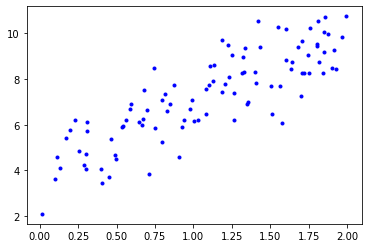

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.05655096],
       [2.9373069 ]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.05655096],
       [9.93116475]])

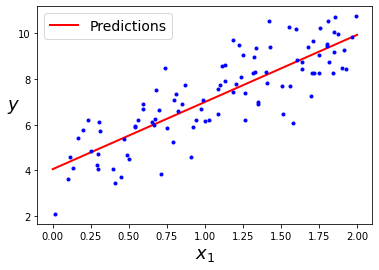

In [4]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.05655096]), array([[2.9373069]]))

Si comparamos con los parametros de frabricacion de los datos podemos apreciar que son bastante proximos.

La clase LinearRegression se basa en la función scipy.linalg.lstsq() (el nombre significa "mínimos cuadrados"), que puedes llamar directamente:



In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.05655096],
       [2.9373069 ]])

La ecuación normal tambien puede ser descrita en terminos de la una pseudoinverse  $X^{+}$ (specifically, the Moore-Penrose inverse), consideramos:

$$
X^{+}=(\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \Rightarrow \hat{θ}  = X^{+} \mathbf{y} 
$$
En codigo: 

```
np.linalg.pinv(X)
```
La ecuación normal puede tener problemas si: $\mathbf{X}$ no es invertible, si $m < n$ o si algunas características son redundantes, pero el pseudoinverso siempre está definido ademas esta ultima es más eficiente computacionalmente ¿por qué? no se XD.



## Complejidad computacional.

https://www.youtube.com/watch?v=Rk9QU-lOPtI 
en el minuto 16:33 aparece un algoritmo para multiplicar matrices en donde se utiliza 3 ciclos for, este seria el metodo bruto y podria explicar por que a lo mas la multiplicacion de matrices es $O(n^3)$

Para la ecuación normal, para calcular $(X^T X)^{-1}$ considera que es una matriz $(n + 1) \times (n + 1)$ (donde n es el número de características). La complejidad computacional de $(X^T X)^{-1}$ suele ser de $O(n^{2.4})$ a $O(n^3)$, dependiendo de la implementación. En otras palabras, si se duplica el número de características, se multiplica el tiempo de cálculo por aproximadamente $2^{2.4} = 5,3$ a $2^{3} =8$.

**El enfoque SVD utilizado por la clase LinearRegression de Scikit-Learn** es aproximadamente $O(n^2)$. Si se duplica el número de características, se multiplica el tiempo de cálculo por aproximadamente 4.

--------------------------------------------------------------------------------

ADVERTENCIA

Tanto la Ecuación Normal como el enfoque SVD se vuelven muy lentos cuando el número de características crece (por ejemplo, 100.000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son O(m)), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que puedan caber en la memoria.

--------------------------------------------------------------------------------

Además, una vez que se ha entrenado el modelo de regresión lineal (utilizando la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto al número de instancias sobre las que se quieren hacer predicciones y al número de características. En otras palabras, hacer predicciones sobre el doble de instancias (o el doble de características) llevará aproximadamente el doble de tiempo.

Ahora veremos una forma muy diferente de entrenar un modelo de regresión lineal, que es más adecuada para los casos en los que hay un gran número de características o demasiadas instancias de entrenamiento que caben en la memoria.




## Descenso de gradiente.

El descenso de gradiente es un algoritmo de optimización genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general del Descenso de Gradientes es ajustar los parámetros de forma iterativa para minimizar una función de coste.

Supongamos que se encuentra perdido en las montañas en medio de una densa niebla, y que sólo puede sentir la pendiente del suelo bajo sus pies. Una buena estrategia para llegar rápidamente al fondo del valle es ir cuesta abajo en la dirección de la pendiente más pronunciada. Esto es exactamente lo que hace el Descenso del Gradiente: mide el gradiente local de la función de error con respecto al vector de parámetros θ, y va en la dirección del gradiente descendente. Una vez que el gradiente es cero, ¡se ha alcanzado un mínimo!

Concretamente, se empieza con valores aleatorios de θ (esto se llama inicialización aleatoria). A continuación, se mejora gradualmente, dando un paso de bebé a la vez, cada paso tratando de disminuir la función de coste (por ejemplo, el MSE), hasta que el algoritmo converge a un mínimo (véase la Figura 4-3).

![image.png](https://i.imgur.com/awM77ZX.png)


Un parámetro importante en el Descenso Gradual es el tamaño de los pasos, determinado por el hiperparámetro tasa de aprendizaje. Si la tasa de aprendizaje es demasiado pequeña, el algoritmo tendrá que pasar por muchas iteraciones para converger, lo que llevará mucho tiempo. 

Por otro lado, si la tasa de aprendizaje es demasiado alta, podría saltar a través del valle y terminar en el otro lado, posiblemente incluso más arriba de lo que estaba antes. Esto podría hacer que el algoritmo diverja, con valores cada vez más grandes, sin encontrar una buena solución.

Por último, no todas las funciones de coste tienen el aspecto de cuencos bonitos y regulares. Puede haber agujeros, crestas, mesetas y todo tipo de terrenos irregulares, lo que dificulta la convergencia al mínimo. La Figura 4-6 muestra los dos principales retos de la Descendencia Gradual. Si la inicialización aleatoria inicia el algoritmo a la izquierda, entonces convergerá a un mínimo local, que no es tan bueno como el mínimo global. Si comienza por la derecha, entonces tardará mucho tiempo en cruzar la meseta. Y si se detiene demasiado pronto, nunca alcanzará el mínimo global.

![image.png](https://i.imgur.com/DtvGLq0.png)

Afortunadamente, la función de coste MSE para un modelo de Regresión Lineal resulta ser una función convexa, lo que significa que si se eligen dos puntos cualesquiera de la curva, el segmento de línea que los une nunca cruza la curva. Esto implica que no hay mínimos locales, sólo un mínimo global. También es una función continua con una pendiente que nunca cambia bruscamente. Estos dos hechos tienen una gran consecuencia: Se garantiza que el Descenso Gradiente se acerca arbitrariamente al mínimo global (si se espera lo suficiente y si la tasa de aprendizaje no es demasiado alta).

De hecho, la función de coste tiene la forma de un cuenco, pero puede ser un cuenco alargado si las características tienen escalas muy diferentes. La figura 4-7 muestra el descenso por gradiente en un conjunto de entrenamiento en el que las características 1 y 2 tienen la misma escala (a la izquierda), y en un conjunto de entrenamiento en el que la característica 1 tiene valores mucho más pequeños que la característica 2 (a la derecha). 

![image.png](https://i.imgur.com/AFMrtcp.png)

-------------------------------------------------------

Al usar Gradient Descent, debe asegurarse de que todas las funciones tengan una escala similar (por ejemplo, usando la clase StandardScaler de Scikit-Learn), o de lo contrario, la convergencia llevará mucho más tiempo.

-------------------------------------------------------


## Batch Gradient Descent. 

Para implementar el Descenso Gradiente, necesitas calcular el gradiente de la función de coste con respecto a cada parámetro del modelo θ. En otras palabras, necesitas calcular cuánto cambiará la función de coste si cambias θ sólo un poco. Esto se llama derivada parcial. Es como preguntar "¿Cuál es la pendiente de la montaña bajo mis pies si miro hacia el este?" y luego hacer la misma pregunta mirando hacia el norte (y así para todas las demás dimensiones, si se puede imaginar un universo con más de tres dimensiones).
La ecuacion para describir esto es la siguiente: 
$$ 
\frac{\partial} { \partial \mathbf{θ}_j}MSE(\mathbf{θ})= \frac{2}{m} \sum_{i=1}^{m} \left(\textbf{θ}^T \mathbf{x}^{(i)}-y^{(i)}\right) x_j^{(i)}
$$

En lugar de calcular estas derivadas parciales individualmente, puede utilizar la siguiente ec para calcularlas todas de una sola vez. El vector de gradiente, anotado $\nabla_\mathbf{θ} MSE(\mathbf{θ})$, contiene todas las derivadas parciales de la función de coste (una por cada parámetro del modelo).

$$
\begin{align*}
\nabla_\mathbf{θ} MSE(\mathbf{θ})  &=\begin{pmatrix} \frac{\partial} { \partial \mathbf{θ}_0}MSE(\mathbf{θ})\\ .\\.\\.\\ \frac{\partial} { \partial \mathbf{θ}_n}MSE(\mathbf{θ}) \end{pmatrix} = \frac{2}{m} \mathbf{X}^T (\mathbf{X}\mathbf{θ}-y)
\end{align*}
$$

--------------------------------------------------------------------------------

WARNING

Observe que esta fórmula implica cálculos sobre todo el conjunto de entrenamiento X, en cada paso del Gradient Descent. Por eso el algoritmo se llama Batch Gradient Descent: utiliza todo el lote de datos de entrenamiento en cada paso **(en realidad, Full Gradient Descent sería probablemente un nombre mejor)**. Como resultado, es terriblemente lento en conjuntos de entrenamiento muy grandes (pero en breve veremos algoritmos de descenso de gradiente mucho más rápidos). Sin embargo, **el Descenso de Gradientes se escala bien con el número de características**; el entrenamiento de un modelo de Regresión Lineal cuando hay cientos de miles de características es mucho más rápido usando el Descenso de Gradientes que usando la Ecuación Normal o la descomposición SVD

--------------------------------------------------------------------------------

Gradient Descent step:

$$
θ^{\text{next step}} = θ − \eta\nabla_\mathbf{θ} MSE(\mathbf{θ})
$$

Una vez que se tiene el vector gradiente, que apunta hacia arriba, basta con ir en la dirección opuesta para ir hacia abajo. Esto significa restar $\nabla_\mathbf{θ} MSE(\mathbf{θ})$ a $\mathbf{θ}$. Aquí es donde entra en juego la tasa de aprendizaje η: multiplicar el vector gradiente por $\eta$ para determinar el tamaño del paso cuesta abajo



In [7]:
import numpy as np 

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [8]:
theta

array([[4.05655096],
       [2.9373069 ]])

¡Eso es exactamente lo que encontró la Ecuación Normal! El Descenso Gradual funcionó perfectamente. Pero, ¿qué pasaría si hubiera utilizado una tasa de aprendizaje eta diferente? La Figura 4-8 muestra los primeros 10 pasos del Descenso de Gradientes utilizando tres tasas de aprendizaje diferentes (la línea discontinua representa el punto de partida).

![image.png](https://i.imgur.com/L9Ku5p8.png)

A la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo acabará llegando a la solución, pero tardará mucho tiempo. En el medio, la tasa de aprendizaje parece bastante buena: en pocas iteraciones, ya ha convergido a la solución. A la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, saltando por todas partes y alejándose cada vez más de la solución en cada paso.

Para encontrar una buena tasa de aprendizaje, se puede utilizar la búsqueda en cuadrícula (véase el capítulo 2). Sin embargo, es posible que quiera limitar el número de iteraciones para que la búsqueda en cuadrícula pueda eliminar los modelos que tardan demasiado en converger. Quizá se pregunte cómo establecer el número de iteraciones. Si es demasiado bajo, seguirá estando lejos de la solución óptima cuando el algoritmo se detenga; pero si es demasiado alto, perderá tiempo mientras los parámetros del modelo no cambian más. Una solución sencilla es establecer un número muy grande de iteraciones pero interrumpir el algoritmo cuando el vector gradiente se vuelve diminuto -es decir, cuando su norma se vuelve más pequeña que un número minúsculo ϵ (llamado la tolerancia)- porque esto sucede cuando el Descenso del Gradiente ha alcanzado (casi) el mínimo.

TASA DE CONVERGENCIA. 

Cuando la función de coste es convexa y su pendiente no cambia bruscamente (como es el caso de la función de coste MSE), el Descenso Gradiente por Lotes con una tasa de aprendizaje fija acabará convergiendo a la solución óptima, pero es posible que tenga que esperar un tiempo: puede tardar O(1/ϵ) iteraciones en alcanzar el óptimo dentro de un rango de ϵ, dependiendo de la forma de la función de coste. Si divides la tolerancia por 10 para tener una solución más precisa, entonces el algoritmo puede tener que correr unas 10 veces más.

## Descenso de gradiente estocástico

El principal problema del descenso de gradiente por lotes es que utiliza todo el conjunto de entrenamiento para calcular los gradientes en cada paso, lo que lo hace muy lento cuando el conjunto de entrenamiento es grande. En el extremo opuesto, el Descenso Gradiente Estocástico escoge una instancia aleatoria del conjunto de entrenamiento en cada paso y calcula los gradientes basándose sólo en esa instancia. Obviamente, trabajar con una sola instancia a la vez hace que el algoritmo sea mucho más rápido porque tiene muy pocos datos que manipular en cada iteración. También permite entrenar en conjuntos de entrenamiento enormes, ya que sólo es necesario tener una instancia en memoria en cada iteración (el GD estocástico puede implementarse como un algoritmo fuera del núcleo; véase el capítulo 1).

Por otro lado, debido a su naturaleza estocástica (es decir, aleatoria), este algoritmo es mucho menos regular que el Descenso Gradiente por Lotes: en lugar de disminuir suavemente hasta alcanzar el mínimo, la función de coste rebotará hacia arriba y hacia abajo, disminuyendo sólo en promedio. Con el tiempo terminará muy cerca del mínimo, pero una vez que llegue allí seguirá rebotando, sin llegar a estabilizarse (ver Figura 4-9). Por tanto, una vez que el algoritmo se detiene, los valores finales de los parámetros son buenos, pero no óptimos.

![images](https://i.imgur.com/7V5ow1n.png)

Cuando la función de coste es muy irregular (como en la Figura 4-6), esto puede ayudar al algoritmo a salir de los mínimos locales, por lo que el Descenso Gradiente Estocástico tiene más posibilidades de encontrar el mínimo global que el Descenso Gradiente por Lotes.

Por lo tanto, **la aleatoriedad es buena para escapar de los óptimos locales, pero mala porque significa que el algoritmo nunca puede establecerse en el mínimo.** Una solución a este dilema es reducir gradualmente la tasa de aprendizaje. Los pasos comienzan siendo grandes (lo que ayuda a progresar rápidamente y a escapar de los mínimos locales), y luego se hacen cada vez más pequeños, lo que permite al algoritmo asentarse en el mínimo global. Este proceso es similar al recocido simulado, un algoritmo inspirado en el proceso de recocido de la metalurgia, en el que el metal fundido se enfría lentamente. La función que determina la tasa de aprendizaje en cada iteración se llama programa de aprendizaje. Si la tasa de aprendizaje se reduce demasiado rápido, puede quedarse atascado en un mínimo local, o incluso acabar congelado a mitad de camino hacia el mínimo. Si la tasa de aprendizaje se reduce demasiado lentamente, puede saltar alrededor del mínimo durante mucho tiempo y terminar con una solución subóptima si se detiene el entrenamiento demasiado pronto.

Este código implementa el Descenso Gradiente Estocástico utilizando un programa de aprendizaje simple:

In [9]:
"""
X = 2 * np.random.rand(100, 1) =>m=100
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) antes 
"""

n_epochs = 50
m = 100
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m): 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.12359336],
       [2.89044454]])

Por convención, iteramos por rondas de m iteraciones; cada ronda se llama una época. Mientras que el código de descenso gradual por lotes itera 1.000 veces a través de todo el conjunto de entrenamiento, este código pasa por el conjunto de entrenamiento sólo 50 veces y alcanza una solución bastante buena:

![images](https://i.imgur.com/fhguoTu.png)

Tenga en cuenta que como las instancias se eligen al azar, algunas instancias pueden ser elegidas varias veces por época, mientras que otras pueden no ser elegidas en absoluto. Si quiere estar seguro de que el algoritmo pasa por todas las instancias en cada época, otro enfoque es barajar el conjunto de entrenamiento (asegurándose de barajar las características de entrada y las etiquetas de forma conjunta), luego pasar por cada instancia, luego barajar de nuevo, y así sucesivamente. Sin embargo, este enfoque suele converger más lentamente.

-------------------------------------------------------------

Warning(razon por la que esta el for random_index() ) 

Cuando se utiliza el Descenso Gradiente Estocástico, las instancias de entrenamiento deben ser **independientes e idénticamente distribuidas (IID)** para asegurar que los parámetros se dirigen hacia el óptimo global, en promedio. Una forma sencilla de asegurar esto es barajar las instancias durante el entrenamiento (por ejemplo, elegir cada instancia al azar, o barajar el conjunto de entrenamiento al principio de cada época). Si no se barajan las instancias -por ejemplo, si las instancias están ordenadas por etiquetas- entonces SGD empezará a optimizar para una etiqueta, luego para la siguiente, y así sucesivamente, y no se acercará al mínimo global.

--------------------------------------------------------------


Para realizar una regresión lineal utilizando GD estocástico con Scikit-Learn, puede utilizar la clase SGDRegressor, que por defecto optimiza la función de coste del error cuadrado. El siguiente código se ejecuta durante un máximo de 1.000 épocas o hasta que la pérdida caiga en menos de 0,001 durante una época (max_iter=1000, tol=1e-3). Comienza con una tasa de aprendizaje de 0,1 (eta0=0,1), utilizando el programa de aprendizaje por defecto (diferente del anterior). Por último, no utiliza ninguna regularización (penalty=None; más detalles sobre esto en breve):

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
print(sgd_reg.fit(X, y.ravel()))
print(sgd_reg.intercept_, sgd_reg.coef_)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
[3.97083543] [2.83461613]


## Mini-lote de descenso de gradiente

El último algoritmo de descenso de gradiente que vamos a estudiar se llama Mini-batch Gradient Descent. Es sencillo de entender una vez que se conoce el Descenso de Gradientes por Lotes y Estocástico: en cada paso, en lugar de calcular los gradientes basándose en el conjunto de entrenamiento completo (como en el GD por Lotes) o basándose en una sola instancia (como en el GD Estocástico), el GD por Minilotes calcula los gradientes en pequeños conjuntos aleatorios de instancias llamados minilotes. La principal ventaja de Minibatch GD sobre Stochastic GD es que puede obtener un aumento de rendimiento gracias a la optimización por hardware de las operaciones matriciales, especialmente cuando se utilizan GPU. El progreso del algoritmo en el espacio de parámetros es menos errático que con Stochastic GD, especialmente con minilotes bastante grandes. Como resultado, Minibatch GD terminará caminando un poco más cerca del mínimo que Stochastic GD-pero puede ser más difícil para él escapar de los mínimos locales (en el caso de problemas que sufren de mínimos locales, a diferencia de la Regresión Lineal). La Figura 4-11 muestra las trayectorias de los tres algoritmos de Descenso Gradual en el espacio de parámetros durante el entrenamiento. Todos acaban cerca del mínimo, pero el camino de Batch GD se detiene realmente en el mínimo, mientras que tanto Stochastic GD como Mini-batch GD siguen dando vueltas. Sin embargo, no hay que olvidar que Batch GD tarda mucho tiempo en dar cada paso, y Stochastic GD y Mini-batch GD también alcanzarían el mínimo si se utilizara un buen programa de aprendizaje.

![images](https://i.imgur.com/VPoQItX.png)

Comparemos los algoritmos que hemos discutido hasta ahora para la Regresión Lineal (recuerde que m es el número de instancias de entrenamiento y n es el número de características); vea la Tabla 4-1.

![images](https://i.imgur.com/4p9bZQp.png)

--------------------------------------------------------------

NOTA

No hay casi ninguna diferencia después del entrenamiento: todos estos algoritmos terminan con modelos muy similares y hacen predicciones exactamente de la misma manera.

--------------------------------------------------------------

# Regresión polinómica

¿Y si sus datos son más complejos que una línea recta? Sorprendentemente, puede utilizar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacerlo es añadir potencias de cada característica como nuevas características, y luego entrenar un modelo lineal en este conjunto ampliado de características. Esta técnica se llama Regresión Polinómica.

Veamos un ejemplo. Primero, generemos algunos datos no lineales, basados en una simple ecuación cuadrática 

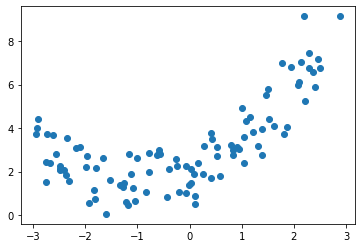

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)

Está claro que una línea recta nunca se ajustará a estos datos correctamente. Así que vamos a utilizar la clase PolynomialFeatures de Scikit- Learn para transformar nuestros datos de entrenamiento, añadiendo el cuadrado (polinomio de segundo grado) de cada característica en el conjunto de entrenamiento como una nueva característica (en este caso sólo hay una característica):

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])


[1.46533618]
[1.46533618 2.14721013]


X_poly contiene ahora la característica original de X más el cuadrado de esta característica. Ahora puede ajustar un modelo de regresión lineal a estos datos de entrenamiento ampliados (Figura 4-13):

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_,lin_reg.intercept_


(array([[0.96203576, 0.47965089]]), array([2.02980577]))

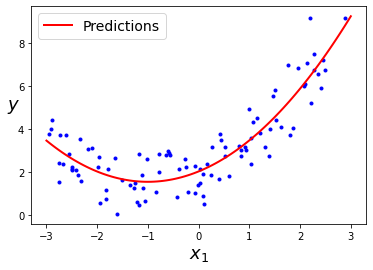

In [14]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

No está mal: el modelo estima $\hat{y} = 0,56x_{1}^{2} + 0,93x_{1} + 1,78$ cuando en realidad la función original era $y = 0,5x_{1}^{2} + 1,0x_{1} + 2,0 + \text{ruido gaussiano}$. 

Tenga en cuenta que cuando hay múltiples características, la regresión polinómica es capaz de encontrar relaciones entre las características (algo que un modelo de regresión lineal simple no puede hacer). Esto es posible gracias a que PolynomialFeatures también suma todas las combinaciones de características hasta el grado dado. Por ejemplo, si hubiera dos características $a$ y $b$, PolynomialFeatures con grado=3 no sólo añadiría las características $a^2$ , $a^3$ , $b^2$ , y $b^3$ , sino también las combinaciones $ab$, $a^2b$, y $ab^2$ .

-------------------------------------------------------------

WARNING

PolynomialFeatures(degree=d) transforma un array que contiene n características en una array que contiene $\frac{(n+d)!}{d!n!}$ características, donde $n!$ es el factorial de $n$, igual a $1 × 2 × 3 × ⋯ × n$. ¡Cuidado con la explosión combinatoria del número de características!

-------------------------------------------------------------

# Curvas de aprendizaje

Si realiza una Regresión Polinómica de alto grado, es probable que se ajuste a los datos de entrenamiento mucho mejor que con la Regresión Lineal pura. Por ejemplo, la Figura 4-14 aplica un modelo polinómico de 300 grados a los datos de entrenamiento anteriores, y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinómico de segundo grado). Observe cómo el modelo polinómico de 300 grados se mueve para acercarse lo más posible a las instancias de entrenamiento.

(-3.0, 3.0, 0.0, 10.0)

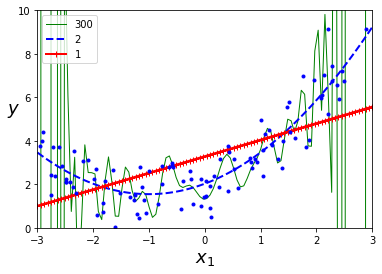

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

Este modelo de regresión polinómica de alto grado se ajusta en exceso a los datos de entrenamiento, mientras que el modelo lineal se ajusta por debajo. El modelo que mejor generalizará en este caso es el modelo cuadrático, lo que tiene sentido porque los datos se generaron utilizando un modelo cuadrático. Pero en general no sabrás qué función generó los datos, así que ¿cómo puedes decidir lo complejo que debe ser tu modelo? ¿Cómo puede saber si su modelo se ajusta demasiado o poco a los datos?

En el capítulo 2 se utilizó la validación cruzada para obtener una estimación del rendimiento de generalización de un modelo. **Si un modelo tiene un buen rendimiento en los datos de entrenamiento pero generaliza mal según las métricas de validación cruzada, entonces su modelo está sobreajustado. Si su rendimiento es deficiente en ambos casos, el ajuste es insuficiente.** Esta es una forma de saber si un modelo es demasiado simple o demasiado complejo. Otra forma de saberlo es observar las curvas de aprendizaje: son gráficos del rendimiento del modelo en el conjunto de entrenamiento y en el conjunto de validación en función del tamaño del conjunto de entrenamiento (o de la iteración de entrenamiento). Para generar los gráficos, entrene el modelo varias veces en subconjuntos de diferente tamaño del conjunto de entrenamiento. El siguiente código define una función que, dados unos datos de entrenamiento, traza las curvas de aprendizaje de un modelo:


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                      random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Veamos las curvas de aprendizaje del modelo de regresión lineal simple :

(0.0, 80.0, 0.0, 3.0)

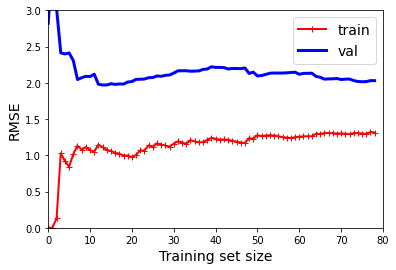

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

Este modelo que se ajusta mal merece un poco de explicación. En primer lugar, observemos el rendimiento de los datos de entrenamiento: cuando sólo hay uno o dos casos en el conjunto de entrenamiento, el modelo puede ajustarse perfectamente a ellos, por lo que la curva empieza en cero. Pero a medida que se añaden nuevos casos al conjunto de entrenamiento, es imposible que el modelo se ajuste perfectamente a los datos de entrenamiento, tanto porque los datos son ruidosos como porque no son lineales en absoluto. Por tanto, el error en los datos de entrenamiento aumenta hasta que llega a una meseta, momento en el que añadir nuevas instancias al conjunto de entrenamiento no hace que el error medio mejore o empeore mucho. Veamos ahora el rendimiento del modelo en los datos de validación. Cuando el modelo se entrena con muy pocas instancias de entrenamiento, es incapaz de generalizar adecuadamente, por lo que el error de validación es inicialmente bastante grande. Luego, a medida que el modelo recibe más ejemplos de entrenamiento, aprende y, por tanto, el error de validación disminuye lentamente. Sin embargo, una vez más, una línea recta no puede hacer un buen trabajo modelando los datos, por lo que el error termina en una meseta, muy cerca de la otra curva. Estas curvas de aprendizaje son típicas de un modelo que está infraajustado.

Ambas curvas han llegado a una meseta; están cerca y son bastante altas.

-------------------------------------------------------------
CONSEJO 

Si su modelo no se ajusta a los datos de entrenamiento, añadir más ejemplos de entrenamiento no le ayudará. Es necesario utilizar un modelo más complejo o crear mejores características.

-------------------------------------------------------------

Ahora veamos las curvas de aprendizaje de un modelo polinómico de 10th grado sobre los mismos datos (Figura 4-16):

(0.0, 80.0, 0.0, 3.0)

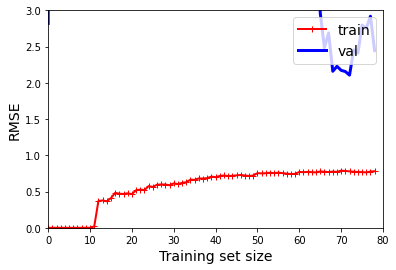

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])  

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos diferencias muy importantes:

* El error en los datos de entrenamiento es mucho menor que con el modelo de regresión lineal.

* Hay una brecha entre las curvas. Esto significa que el modelo funciona mucho mejor en los datos de entrenamiento que en los datos de validación, lo cual es el sello de un modelo sobreajustado. Sin embargo, si se utiliza un conjunto de entrenamiento mucho mayor, las dos curvas seguirán acercándose. 

--------------------------------------------------------------
SUGERENCIA 

Una forma de mejorar un modelo sobreajustado es alimentarlo con más datos de entrenamiento hasta que el error de validación alcance el error de entrenamiento.

--------------------------------------------------------------
EL EQUILIBRIO ENTRE SESGO Y VARIANZA

Un importante resultado teórico de la estadística y el aprendizaje automático es el hecho de que el error de generalización de un modelo puede expresarse como la suma de tres errores muy diferentes: 

*Sesgo*

Esta parte del error de generalización se debe a supuestos erróneos, como suponer que los datos son lineales cuando en realidad son cuadráticos. Un modelo con un sesgo elevado tiene muchas probabilidades de no ajustarse a los datos de entrenamiento. 
 
*Varianza*

Esta parte se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Un modelo con muchos grados de libertad (como un modelo polinómico de alto grado) es probable que tenga una alta varianza y, por tanto, que se ajuste en exceso a los datos de entrenamiento.

*Error irreductible*

 Esta parte se debe al ruido de los propios datos. La única manera de reducir esta parte del error es limpiar los datos (por ejemplo, arreglar las fuentes de datos, como los sensores rotos, o detectar y eliminar los valores atípicos).
 
**El aumento de la complejidad de un modelo suele aumentar su varianza y reducir su sesgo. A la inversa, reducir la complejidad de un modelo aumenta su sesgo y reduce su varianza. Por eso se denomina trade-off.**

(0.0, 80.0, 0.0, 3.0)

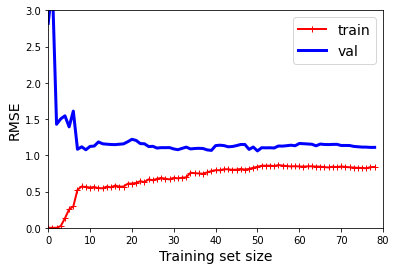

In [19]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

En este caso creo que este seria la evolucion del error mas optima 

# Modelos lineales regularizados

Como vimos en los capítulos 1 y 2, una buena forma de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuantos menos grados de libertad tenga, más difícil será que sobreajuste los datos. Una forma sencilla de regularizar un modelo polinómico es reducir el número de grados del polinomio. 

En el caso de un modelo lineal, la regularización se consigue normalmente restringiendo los pesos del modelo. A continuación veremos la regresión Ridge,Regresión Lasso, y Red Elástica, que implementan tres formas diferentes de restringir los pesos. 

**La regresión de Ridge y Lasso son algunas de las técnicas simples para reducir la complejidad del modelo y evitar el ajuste excesivo que puede resultar de una regresión simples.**

## La regresión Ridge

También llamada regularización de Tikhonov es una versión regularizada de la regresión lineal: se añade a la función de coste un término de regularización igual a $α \sum_{i=1}^n  θ_i^2$ . Esto obliga al algoritmo de aprendizaje no sólo a ajustarse a los datos, sino también a mantener las ponderaciones del modelo lo más pequeñas posible. Tenga en cuenta que el término de regularización sólo debe añadirse a la función de coste durante el entrenamiento. Una vez entrenado el modelo, se quiere utilizar la medida de rendimiento no regularizada para evaluar el rendimiento del modelo.

--------------------------------------------------------------

NOTA 

Es bastante común que la función de coste utilizada durante el entrenamiento sea diferente de la medida de rendimiento utilizada para las pruebas. Aparte de la regularización, otra razón por la que pueden ser diferentes es que una buena función de coste de entrenamiento debe tener derivadas que faciliten la optimización, mientras que la medida de rendimiento utilizada para las pruebas debe estar lo más cerca posible del objetivo final. Por ejemplo, los clasificadores se entrenan a menudo utilizando una función de coste como la pérdida logarítmica (de la que hablaremos más adelante), pero se evalúan utilizando la precisión/sensibillidad. 

--------------------------------------------------------------

El hiperparámetro α controla cuánto se quiere regularizar el modelo. Si $α = 0$, la regresión Ridge es simplemente una regresión lineal. Si α es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos. La ecuación presenta la función de coste de la regresión Ridge.

$$
J(\textbf{θ})=\operatorname{MSE}(\textbf{θ}) + \frac{α}{2} \sum_{i=1}^n  θ_i^2
$$ 

Nótese que el término de sesgo $θ_0$ no está regularizado (la suma comienza en $i = 1$, no en 0). Si definimos **w** como el vector de pesos de características ($θ_1$ a $θ_n$ ), entonces el término de regularización es igual a $\frac{1}{2}(∥ \textbf{w} ∥_2 )^2$ , donde $∥ \textbf{w} ∥_2$ representa el $ℓ_2$ norma del vector de pesos. Para la regresión por gradiente, basta con añadir $αw$ al vector de gradiente MSE (ecuación 4-6). 

--------------------------------------------------------------

ADVERTENCIA 

Es importante escalar los datos (por ejemplo, utilizando un StandardScaler) antes de realizar la Regresión Ridge, ya que es sensible a la escala de las características de entrada. Esto es cierto para la mayoría de los modelos regularizados. 

-----------------------------------------------------------

La Figura 4-17 muestra varios modelos Ridge entrenados en algunos datos lineales utilizando diferentes valores α. A la izquierda, se utilizan modelos Ridge simples, que conducen a predicciones lineales. A la derecha, los datos se expanden primero usando PolynomialFeatures(degree=10), luego se escalan usando StandardScaler, y finalmente los modelos Ridge se aplican a las características resultantes: esto es Regresión Polinomial con regularización Ridge. **Observe cómo el aumento de α conduce a predicciones más planas (es decir, menos extremas, más razonables), reduciendo así la varianza del modelo pero aumentando su sesgo.**

**conclusion**: 
- entre mayor es el alpha menos se consideran los valores atipicos
- penaliza los features poco relevantes, pero nos los vuelve cero, limita la informacion que aporta a nuestro modelo.
- ocupar si hay muchos features relacionados con la variable a predecir(ver matriz de correlacion).

In [20]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

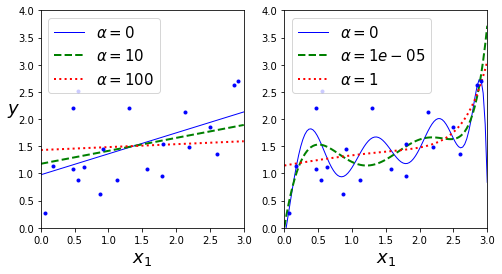

In [21]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

#para estar preparados para el futuro, establecemos max_iter=1000 y tol=1e-3
# porque estos serán los valores por defecto en Scikit-Learn 0.21.

Al igual que con la Regresión Lineal, podemos realizar la Regresión Ridge bien calculando una ecuación de forma cerrada o bien realizando el Descenso Gradiente. Los pros y los contras son los mismos. La ecuación 4-9 muestra la solución de forma cerrada, donde A es la matriz de identidad $(n + 1) × (n + 1)$, excepto con un 0 en la celda superior izquierda, que corresponde al término de sesgo.

$$
\hat{θ}  = (\mathbf{X}^T \mathbf{X} + α\mathbf{A})^{-1}\mathbf{X}^T \mathbf{y}
$$

A continuación se explica cómo realizar la regresión Ridge con Scikit-Learn utilizando una solución de forma cerrada (una variante de la ecuación 4-9 que utiliza una técnica de factorización de matrices de André-Louis Cholesky):

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [23]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [24]:
#using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

El hiperparámetro de penalización establece el tipo de término de regularización a utilizar. Especificar "l2" indica que quiere que SGD añada un término de regularización a la función de coste igual a la mitad del cuadrado de la norma ℓ del vector de pesos: esto es simplemente Regresión Ridge.


## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression  (normalmente llamada simplemente Regresión Lasso) es otra versión regularizada de la Regresión Lineal: al igual que la Regresión Ridge, añade un término de regularización a la función de coste, pero utiliza la norma ℓ del vector de pesos en lugar de la mitad del cuadrado de la norma ℓ (véase la ecuación 4-10).

$$
J(\textbf{θ})=\operatorname{MSE}(\textbf{θ}) + \frac{α}{2} \sum_{i=1}^n  |θ_i|
$$ 

La Figura 4-18 muestra lo mismo que la Figura 4-17 pero sustituye los modelos Ridge por modelos Lasso y utiliza valores α más pequeños.




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


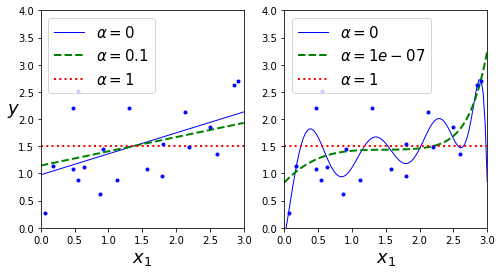

In [25]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

Una característica importante de la regresión Lasso es que tiende a eliminar los pesos de las características menos importantes (es decir, los pone a cero). Por ejemplo, la línea discontinua en el gráfico de la derecha de la Figura 4-18 (con α = 10^7$ ) parece cuadrática, casi lineal: todos los pesos de las características polinómicas de alto grado son iguales a cero. En otras palabras, la regresión Lasso realiza automáticamente la selección de características y produce un modelo disperso (es decir, con pocas ponderaciones de características distintas de cero).

Puede tener una idea de por qué esto es así observando la Figura 4-19: los ejes representan dos parámetros del modelo, y los contornos del fondo representan diferentes funciones de pérdida. En el gráfico superior izquierdo, los contornos representan la pérdida $ℓ_1$ $(|θ_1 | + |θ_2 |)$, que cae linealmente a medida que se acerca a cualquier eje. Por ejemplo, si se inicializan los parámetros del modelo a $θ_1 = 2$ y $θ_2 = 0,5$, la ejecución del Descenso por Gradientes disminuirá ambos parámetros por igual (como se representa por la línea amarilla discontinua); por lo tanto, $θ_2$ llegará a 0 primero (ya que estaba más cerca de 0 para empezar). Después de eso, Gradient Descent rodará por el canalón hasta llegar a $θ_1 = 0$ (con un poco de rebote, ya que los gradientes de $ℓ_1$ nunca se acercan a 0: son -1 o 1 para cada
parametro). En el gráfico superior derecho, los contornos representan la función de coste de Lasso (es decir, una función de coste MSE más una pérdida $ℓ_1$). Los pequeños círculos blancos muestran el camino que toma el Descenso Gradiente para optimizar algunos parámetros del modelo que se inicializaron en torno a $θ_1 = 0,25$ y $θ_2 = -1$: nótese una vez más cómo el camino alcanza rápidamente $θ_2$ = 0, luego rueda por el canalón y acaba rebotando alrededor del óptimo global (representado por el cuadrado rojo). Si aumentamos α, el óptimo global se movería hacia la izquierda a lo largo de la línea amarilla discontinua, mientras que si disminuimos α, el óptimo global se movería hacia la derecha (en este ejemplo, los parámetros óptimos para el MSE no regularizado son $θ_1 = 2$ y $θ_2 = 0,5$).

Conclusiones:  
- Se penalizan los datos que no cambian tanto(en teoria estos datos no aportan tanto). 
- si hay pocos features que se relaciones directamente con las variables a predecir los hace cero(no los considera ). 

![images](https://i.imgur.com/pLvtmAK.png)


Los dos gráficos inferiores muestran lo mismo pero con una penalización de ℓ2 en su lugar. En el gráfico de abajo a la izquierda, se puede ver que la pérdida ℓ2 disminuye con la distancia al origen, por lo que el Descenso Gradual simplemente toma un camino recto hacia ese punto. En el gráfico inferior derecho, los contornos representan la función de coste de la Regresión de Cresta (es decir, una función de coste MSE más una pérdida ℓ2). Hay dos diferencias principales con Lasso. **En primer lugar, los gradientes se hacen más pequeños a medida que los parámetros se acercan al óptimo global, por lo que el Descenso de Gradientes se ralentiza de forma natural, lo que ayuda a la convergencia (ya que no hay rebotes). En segundo lugar, los parámetros óptimos (representados por el cuadrado rojo) se acercan cada vez más al origen cuando se aumenta α , pero nunca se eliminan por completo.**

---------------------------------------------------------------------------
CONSEJO

Para evitar que el Descenso Gradual rebote alrededor del óptimo al final cuando se utiliza el Lasso, es necesario reducir gradualmente la tasa de aprendizaje durante el entrenamiento (seguirá rebotando alrededor del óptimo, pero los pasos serán cada vez más pequeños, por lo que convergerá).

---------------------------------------------------------------------------
La función de coste Lasso no es diferenciable en $θ_i = 0 (\text{para }  i = 1, 2, ⋯, n)$, pero el Descenso Gradiente sigue funcionando bien si se utiliza un vector subgradiente g en su lugar cuando cualquier $θ_i = 0$. La ecuación 4-11 muestra una ecuación de vector subgradiente que puede utilizar para el Descenso Gradiente con la función de coste Lasso
![images](https://i.imgur.com/IK57f8o.png)

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Tenga en cuenta que podría utilizar en su lugar SGDRegressor(penalty="l1").

## Elastic Net

Elastic Net es un término medio entre la regresión Ridge y la regresión Lasso. El término de regularización es una simple mezcla de los términos de regularización de Ridge y Lasso, y se puede controlar el ratio de mezcla r. Cuando r = 0, Elastic Net es equivalente a la Regresión Ridge, y cuando r = 1, es equivalente a la Regresión Lasso (ver Ecuación 4-12).
$$
J(\boldsymbol{\theta})=\operatorname{MSE}(\boldsymbol{\theta})+r \alpha \sum_{i=1}^{n}\left|\theta_{i}\right|+\frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}{ }^{2}
$$
**Entonces, ¿cuándo debe utilizar la regresión lineal simple (es decir, sin ninguna regularización), Ridge, Lasso o Elastic Net? Casi siempre es preferible tener al menos un poco de regularización, por lo que generalmente debe evitar la regresión lineal simple. Ridge es una buena opción por defecto, pero si sospecha que sólo unas pocas características son útiles, debería preferir Lasso o Elastic Net porque tienden a reducir los pesos de las características inútiles a cero, como hemos comentado. En general, se prefiere Elastic Net a Lasso porque éste puede comportarse de forma errática cuando el número de características es mayor que el número de instancias de entrenamiento o cuando varias características están fuertemente correlacionadas.** He aquí un breve ejemplo que utiliza ElasticNet de Scikit-Learn (l1_ratio corresponde a la relación de mezcla r):





In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

Una forma muy diferente de regularizar los algoritmos de aprendizaje iterativo, como el Gradient Descent, es detener el entrenamiento tan pronto como el error de validación alcance un mínimo. Esto se denomina parada temprana. La Figura 4-20 muestra un modelo complejo (en este caso, un modelo de Regresión Polinómica de alto grado) siendo entrenado con el Descenso de Gradientes por Lotes. A medida que pasan las épocas, el algoritmo aprende, y su error de predicción (RMSE) en el conjunto de entrenamiento disminuye, junto con su error de predicción en el conjunto de validación. Sin embargo, al cabo de un tiempo, el error de validación deja de disminuir y empieza a subir. Esto indica que el modelo ha empezado a sobreajustar los datos de entrenamiento. Con la parada anticipada, simplemente se detiene el entrenamiento en cuanto el error de validación alcanza el mínimo. Es una técnica de regularización tan simple y eficiente que Geoffrey Hinton la llamó "un hermoso almuerzo gratis".

In [28]:

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [29]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, 
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

Text(0, 0.5, 'RMSE')

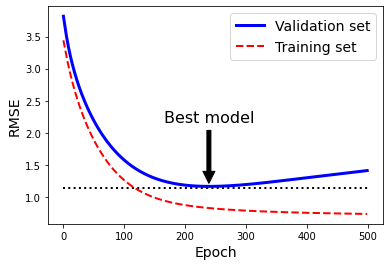

In [30]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

TIP

Con el Descenso Gradiente Estocástico y Mini-Lote, las curvas no son tan suaves, y puede ser difícil saber si se ha alcanzado el mínimo o no. Una solución es detenerse sólo después de que el error de validación haya estado por encima del mínimo durante algún tiempo (cuando esté seguro de que el modelo no va a mejorar), entonces retroceder los parámetros del modelo hasta el punto en el que el error de validación es mínimo. al punto en el que el error de validación era mínimo.

He aquí una implementación básica de la parada anticipada:

Tenga en cuenta que con warm_start=True, cuando se llama al método fit() éste continúa el entrenamiento donde lo dejó, en lugar de reiniciar desde cero.

?????????????????





# Logistic Regression

Como ya comentamos en el capítulo 1, algunos algoritmos de regresión pueden utilizarse para la clasificación (y viceversa). La regresión logística (también llamada regresión Logit) se suele utilizar para estimar la probabilidad de que una instancia pertenezca a una clase determinada (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?). Si la probabilidad estimada es superior al 50%, el modelo predice que la instancia pertenece a esa clase (denominada clase positiva, etiquetada como "1"), y en caso contrario predice que no (es decir, que pertenece a la clase negativa, etiquetada como "0"). Esto lo convierte en un clasificador binario.

## Estimating Probabilities

¿Cómo funciona la regresión logística? Al igual que un modelo de regresión lineal, un modelo de regresión logística calcula una suma ponderada de las características de entrada (más un término de sesgo), pero en lugar de emitir el resultado directamente como hace el modelo de regresión lineal, emite la logística de este resultado
$$
\hat{p} = h_θ(x) = σ (x^⊺θ)
$$

La logística -anotada como σ(-)- es una función sigmoidea (es decir, con forma de S) que arroja un número entre 0 y 1. Se define como se muestra en la ecuación 4-14 y en la figura 4-21.
$$
σ (t) =\frac{1}{1 + exp(−t)}
$$





(-10.0, 10.0, -0.1, 1.1)

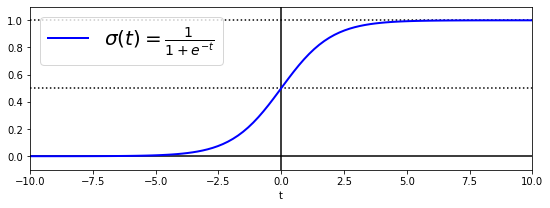

In [31]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

Una vez que el modelo de regresión logística ha estimado la probabilidad $\hat{p} = h_θ (x)$ de que una instancia x pertenezca a la clase positiva, puede realizar su predicción $\hat{y}$ fácilmente (véase la ecuación 4-15). Ecuación 4-15. Predicción del modelo de regresión logística
$$
\hat{y}=\left\{\begin{array}{ll}
0 & \text { if } \hat{p}< 0.5 \\
1 & \text { if } \hat{p} \geq 0.5
\end{array}\right.
$$

Observe que $σ(t)< 0,5$ cuando $t < 0$ , y $σ(t)≥0,5$ cuando $t≥0$ , por lo que un modelo de Regresión Logística predice 1 si $x^Tθ$ es positivo y 0 si es negativo.

----

Nota

La puntuación t suele denominarse logit. El nombre proviene del hecho de que la función logit, definida como $\text{logit}(p) = log\frac{p} {1 - p}$, es la inversa de la función logística. De hecho, si se calcula el logit de la probabilidad estimada p, se encontrará que el resultado es t. El logit también se llama log-odds, ya que es el logaritmo de la relación entre la probabilidad estimada para la clase positiva y la probabilidad estimada para la clase negativa

---


## Training and Cost Function

Ahora ya sabe cómo un modelo de regresión logística estima las probabilidades y hace predicciones. Pero, ¿cómo se entrena? El objetivo del entrenamiento es establecer el vector de parámetros θ para que el modelo estime probabilidades altas para los casos positivos (y = 1) y bajas para los casos negativos (y = 0). Esta idea se recoge en la función de coste que se muestra en la ecuación 4-16 para una única instancia de entrenamiento x.
Considerando: 
$$
\hat{p} =\frac{1}{1 + exp(−x^⊺θ)}
$$
entonces ecuación 4-16: 
$$
c(\textbf{θ})=\left\{\begin{array}{ll}
− log(\hat{p}) & \text { if } y = 1\\
− log(1 - \hat{p}) & \text { if } y = 0
\end{array}\right.
$$

Esta función de coste tiene sentido porque $-log(t)$ crece mucho cuando t se acerca a 0, por lo que el coste será grande si el modelo estima una probabilidad cercana a 0 para un caso positivo, y también será muy grande si el modelo estima una probabilidad cercana a 1 para un caso negativo. Por otro lado, -log(t) es cercano a 0 cuando t es cercano a 1, por lo que el coste será cercano a 0 si la probabilidad estimada es cercana a 0 para un caso negativo o cercana a 1 para un caso positivo, que es precisamente lo que queremos. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


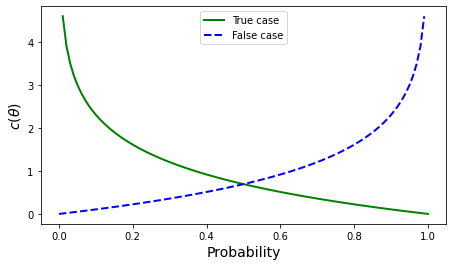

In [32]:
# Cost function of a SINGLE training instance
t = np.linspace(0, 1, 100)
case_true = - np.log(t)
case_false = - np.log(1-t)

plt.figure(figsize=(16, 4))
plt.title("Comparation ")
plt.subplot(122)
plt.plot(t, case_true,"g-", label="True case", linewidth=2)
plt.plot(t, case_false,"b--", label="False case", linewidth=2 )
plt.legend()
plt.ylabel("$c(θ)$", fontsize=14)
plt.xlabel("Probability", fontsize=14)
plt.show()



La función de coste sobre todo el conjunto de entrenamiento es el coste medio sobre todas las instancias de entrenamiento. Se puede escribir en una sola expresión llamada pérdida logarítmica, que se muestra en la ecuación 4-17.

Logistic Regression cost function (log loss):
$$
\hat{p} =\frac{1}{1 + exp(−x^⊺θ)}
$$

$$
J(\boldsymbol{\theta})=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-\hat{p}^{(i)}\right)\right]
$$

La mala noticia es que no se conoce una ecuación de forma cerrada para calcular el valor de $θ$ que minimiza esta función de coste (no hay un equivalente de la ecuación normal. La buena noticia es que esta función de coste es convexa, por lo que el Descenso Gradiente (o cualquier otro algoritmo de optimización) está garantizado para encontrar el mínimo global (si la tasa de aprendizaje no es demasiado grande y se espera lo suficiente). Las derivadas parciales de la función de coste con respecto al parámetro j del modelo θ vienen dadas por la ecuación 4-18.

$$
\frac{\partial}{\partial \theta_{j}} \mathrm{~J}(\boldsymbol{\theta})=\frac{1}{m} \sum_{i=1}^{m}\left(\sigma\left(\boldsymbol{\theta}^{\top} \mathbf{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$

[DEMOSTRACION](https://rpubs.com/dnuttle/ml-logistic-cost-func_derivative)

[DEMO2](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-differentiated)

Esta ecuación se parece mucho a la ecuación 4-5: para cada instancia calcula el error de predicción y lo multiplica por el valor de la característica j, y luego calcula la media de todas las instancias de entrenamiento. Una vez que tienes el vector de gradiente que contiene todas las derivadas parciales, puedes utilizarlo en el algoritmo de descenso de gradiente por lotes. Eso es todo: ahora sabe cómo entrenar un modelo de Regresión Logística. Para la Regresión Logística Estocástica se tomaría una instancia a la vez, y para la Regresión Logística Mini-Lote se usaría un mini-lote a la vez.



## Decision Boundaries
Utilicemos el conjunto de datos del iris para ilustrar la regresión logística. Se trata de un famoso conjunto de datos que contiene la longitud y anchura de los sépalos y pétalos de 150 flores de iris de tres especies diferentes: Iris setosa, Iris versicolor e Iris virginica (véase la Figura 4-22).

![IMAGE](https://i.imgur.com/JFPAkak.png)

Intentemos construir un clasificador para detectar el tipo de Iris virginica basado únicamente en la característica de la anchura de los pétalos. Primero carguemos los datos:



In [33]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [34]:
# Now let’s train a Logistic Regression model:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Veamos las probabilidades estimadas del modelo para flores con pétalos de pétalos que varían de 0 cm a 3 cm (Figura 4-23)

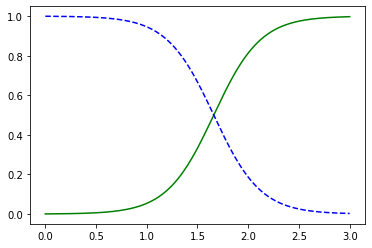

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


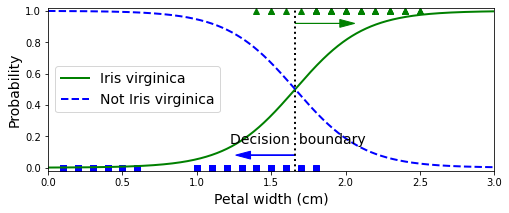

In [36]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

La anchura de los pétalos de las flores de Iris virginica (representadas por triángulos) oscila entre 1,4 cm y 2,5 cm, mientras que las otras flores de iris (representadas por cuadrados) suelen tener una anchura de pétalos menor, que oscila entre 0,1 cm y 1,8 cm. Obsérvese que hay un poco de solapamiento. Por encima de unos 2 cm, el clasificador está muy seguro de que la flor es un Iris virginica (emite una alta probabilidad para esa clase), mientras que por debajo de 1 cm está muy seguro de que no es un Iris virginica (alta probabilidad para la clase "No Iris virginica"). Entre estos extremos, el clasificador no está seguro. Sin embargo, si se le pide que prediga la clase (utilizando el método predict() en lugar del método predict_proba()), devolverá la clase que sea más probable. Por lo tanto, hay un límite de decisión en torno a 1,6 cm en el que ambas probabilidades son iguales al 50%: si la anchura de los pétalos es superior a 1,6 cm, el clasificador predecirá que la flor es una Iris virginica, y en caso contrario predecirá que no lo es (aunque no esté muy seguro):

In [37]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

La Figura 4-24 muestra el mismo conjunto de datos, pero esta vez mostrando dos características: la anchura y la longitud de los pétalos. Una vez entrenado, el clasificador de regresión logística puede, basándose en estas dos características, estimar la probabilidad de que una nueva flor sea un Iris virginica. La línea discontinua representa los puntos en los que el modelo estima una probabilidad del 50%: este es el límite de decisión del modelo. Obsérvese que se trata de un límite lineal. Cada línea paralela representa los puntos en los que el modelo da una probabilidad específica, desde el 15% (abajo a la izquierda) hasta el 90% (arriba a la derecha). Todas las flores más allá de la línea superior derecha tienen una probabilidad superior al 90% de ser Iris virginica, según el modelo.





(2.9, 7.0, 0.8, 2.7)

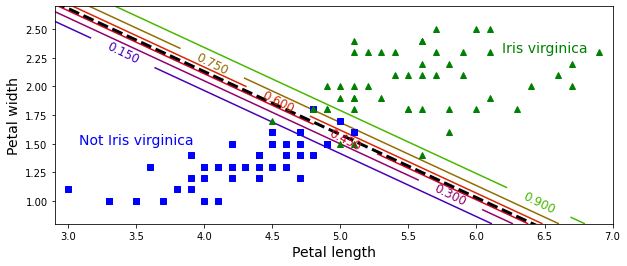

In [38]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

Al igual que los demás modelos lineales, los modelos de regresión logística pueden regularizarse utilizando penalizaciones $ℓ_1$ o $ℓ_2$. Scikit-Learn añade una penalización $ℓ_2$ por defecto.

---

NOTA

El hiperparámetro que controla la fuerza de regularización de un modelo LogisticRegression de Scikit-Learn no es alfa (como en otros modelos lineales), sino su inverso: C. Cuanto más alto sea el valor de C, menos regularizado estará el modelo.

---

## Softmax Regression

El modelo de regresión logística puede generalizarse para admitir múltiples clases directamente, sin tener que entrenar y combinar múltiples clasificadores binarios (como se explica en el capítulo 3). Esto se llama Regresión Softmax, o Regresión Logística Multinomial. La idea es sencilla: cuando se da una instancia x, el modelo de Regresión Softmax calcula primero una puntuación $s_k(x)$ para cada clase k, y luego estima la probabilidad de cada clase aplicando la función softmax (también llamada función normalizada exponencial) a las puntuaciones. La ecuación para calcular $s_k(x)$ debería resultar familiar, ya que es igual que la ecuación para la predicción de Regresión Lineal (véase la Ecuación 4-19).
$$
s_k(x) = x^Tθ^{(k)}
$$

Tenga en cuenta que cada **clase tiene su propio vector de parámetros $θ^{(k)}$**   . Todos estos vectores se suelen almacenar como filas en una matriz de parámetros $Θ$.

Una vez que se ha calculado la puntuación de cada clase para la instancia x, se puede estimar la probabilidad $\hat{p}$ de que la instancia pertenezca a la clase k pasando las puntuaciones por la función softmax (ecuación 4-20). La función calcula el exponencial de cada puntuación y luego los normaliza (dividiendo por la suma de todos los exponenciales). Las puntuaciones se denominan generalmente logits o log-odds (aunque en realidad son log-odds sin normalizar).

$$
\hat{p}_{k}=\sigma(\mathbf{s}(\mathbf{x}))_{k}=\frac{\exp \left(s_{k}(\mathbf{x})\right)}{\sum_{j=1}^{K} \exp \left(s_{j}(\mathbf{x})\right)}
$$

Donde:


* K es el número de clases.
* s(x) es un vector que contiene las puntuaciones de cada clase para la instancia x.
* σ(s(x)) es la probabilidad estimada de que la instancia x pertenezca a clase k, dadas las puntuaciones de cada clase para esa instancia.

Al igual que el clasificador de Regresión Logística, el clasificador de Regresión Softmax
predice la clase con la mayor probabilidad estimada (que es
simplemente la clase con la mayor puntuación), como se muestra en la ecuación 4-21.

$$
\hat{y}=\underset{k}{\operatorname{argmax}} \sigma(\mathbf{s}(\mathbf{x}))_{k}=\underset{k}{\operatorname{argmax}} s_{k}(\mathbf{x})=\underset{k}{\operatorname{argmax}}\left(\left(\boldsymbol{\theta}^{(k)}\right)^{\top} \mathbf{x}\right)
$$

El operador argmax devuelve el valor de una variable que maximiza una función. En esta ecuación, devuelve el valor de k que maximiza la probabilidad estimada $σ(s(x))$ . 

----

SUGERENCIA

El clasificador de regresión Softmax predice sólo una clase a la vez (es decir, es multiclase, no multisalida), por lo que debe utilizarse sólo con clases mutuamente excluyentes, como diferentes tipos de plantas. No se puede utilizar para reconocer a varias personas en una imagen.

----

Ahora que sabe cómo el modelo estima las probabilidades y hace predicciones, echemos un vistazo al entrenamiento. El objetivo es tener un modelo que estime una alta probabilidad para la clase objetivo (y en consecuencia una baja probabilidad para las otras clases). La minimización de la función de coste mostrada en la ecuación 4-22, llamada entropía cruzada, debería conducir a este objetivo porque penaliza al modelo cuando estima una probabilidad baja para una clase objetivo. La entropía cruzada se utiliza con frecuencia para medir lo bien que un conjunto de probabilidades de clase estimadas coincide con las clases objetivo.

$$
J(\mathbf{\Theta})=-\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \log \left(\hat{p}_{k}^{(i)}\right)
$$

En esta ecuación:
* $y_k^{(i)} $ es la probabilidad objetivo de que la instancia i pertenezca a la clase k. En general, es igual a 1 o a 0, dependiendo de si la instancia pertenece a la clase o no. 

Observe que cuando sólo hay dos clases (K = 2), esta función de coste es equivalente a la función de coste de la regresión logística (pérdida logarítmica; véase la ecuación 4-17).

---------

 CROSS ENTROPY

La entropía cruzada tiene su origen en la teoría de la información. Supongamos que se quiere transmitir eficazmente información sobre el tiempo que hará cada día. Si hay ocho opciones (soleado, lluvioso, etc.), podría codificar cada opción con tres bits porque $2^3 = 8$. Sin embargo, si cree que hará sol casi todos los días, sería mucho más eficiente codificar "soleado" en un solo bit (0) y las otras siete opciones en cuatro bits (empezando por un 1). La entropía cruzada mide el número medio de bits que se envían por opción. Si tus suposiciones sobre el tiempo son perfectas, la entropía cruzada será igual a la entropía del propio tiempo (es decir, su imprevisibilidad intrínseca). Pero si sus suposiciones son erróneas (por ejemplo, si llueve a menudo), la entropía cruzada será mayor en una cantidad llamada divergencia Kullback-Leibler (KL). La entropía cruzada entre dos distribuciones de probabilidad p y q se define como $H (p, q) = - \sum_x p(x)\log q(x)$ (al menos cuando las distribuciones son discretas). Para más detalles, consulta mi vídeo sobre el tema.

 ---------

 The gradient vector of this cost function with regard to θ is given by
Equation 4-23.

$$
\nabla_{\boldsymbol{\theta}^{(k)}} J(\mathbf{\Theta})=\frac{1}{m} \sum_{i=1}^{m}\left(\hat{p}_{k}^{(i)}-y_{k}^{(i)}\right) \mathbf{x}^{(i)}
$$

Ahora puede calcular el vector de gradiente para cada clase y, a continuación, utilizar el descenso de gradiente (o cualquier otro algoritmo de optimización) para encontrar la matriz de parámetros Θ que minimiza la función de coste.

Utilicemos la Regresión Softmax para clasificar las flores del iris en las tres clases. La regresión logística de Scikit-Learn utiliza por defecto la regresión de uno contra el resto cuando se entrena con más de dos clases, pero se puede establecer el hiperparámetro multi_clase como "multinomial" para cambiarlo a SoftmaxRegresión. También debe especificar un solucionador que admita la Regresión Softmax, como el solucionador "lbfgs" (consulte la documentación de Scikit-Learn para obtener más detalles). También aplica la regularización $ℓ_2$ por defecto, que puede controlar utilizando el hiperparámetro C:





In [39]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Así que la próxima vez que encuentres un iris con pétalos de 5 cm de largo y 2 cm de ancho, puedes pedirle a tu modelo que te diga qué tipo de iris es, y te responderá Iris virginica (clase 2) con un 94,2% de probabilidad (o Iris versicolor con un 5,8% de probabilidad):

In [40]:
softmax_reg.predict([[5, 2]])


array([2])

In [46]:
softmax_reg.predict_proba([[5, 2]])


array([[6.38014896e-05, 5.74929995e+00, 9.42506362e+01]])

La Figura 4-25 muestra los límites de decisión resultantes, representados por los colores de fondo. Observe que los límites de decisión entre dos clases cualesquiera son lineales. La figura también muestra las probabilidades de la clase Iris versicolor, representadas por las líneas curvas (por ejemplo, la línea marcada con 0,450 representa el límite de probabilidad del 45%). Observe que el modelo puede predecir una clase con una probabilidad estimada inferior al 50%. Por ejemplo, en el punto en el que se encuentran todos los límites de decisión, todas las clases tienen una probabilidad estimada igual del 33%.

In [42]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

(0.0, 7.0, 0.0, 3.5)

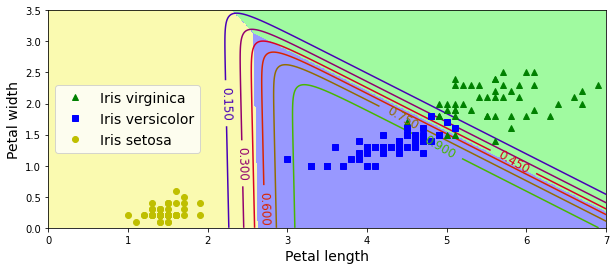

In [43]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

1. ¿Qué algoritmo de entrenamiento de regresión lineal puede utilizar si tiene un conjunto de entrenamiento con millones de características?
2. Suponga que las características de su conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían sufrir esto y cómo? ¿Qué se puede hacer al respecto?
3. ¿Puede el Descenso Gradual quedarse atascado en un mínimo local al entrenar un modelo de Regresión Logística?
4. ¿Todos los algoritmos de Descenso por Gradientes conducen al mismo modelo, siempre que se les deje correr lo suficiente?
5. Supongamos que utilizas el Ascenso Gradual por Lotes y que graficas el error de validación en cada época. Si observas que el error de validación aumenta constantemente, ¿qué es lo que puede estar pasando? ¿Cómo puede solucionarlo?
6. ¿Es una buena idea detener el Mini-Batch Gradient Descent inmediatamente cuando el error de validación aumenta?
7. ¿Qué algoritmo de descenso de gradiente (entre los que hemos discutido) llegará más rápido a la proximidad de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo se puede hacer que los otros converjan también?
8. Supongamos que se utiliza la regresión polinómica. Se trazan las curvas de aprendizaje y se observa que hay una gran diferencia entre el error de entrenamiento y el error de validación. ¿Qué ocurre? ¿Cuáles son las tres formas de resolverlo?
9. Supongamos que utilizas la regresión Ridge y observas que el error de entrenamiento y el de validación son casi iguales y bastante elevados. ¿Diría que el modelo sufre de un alto sesgo o de una alta varianza? ¿Debería aumentar el hiperparámetro de regularización α o reducirlo?
10. ¿Por qué querría utilizar:
    * a. Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin ninguna regularización)? 
    * b. Lasso en lugar de Regresión Ridge? 
    * c. Red Elástica en lugar de Lasso?
11. Supongamos que quiere clasificar las imágenes como exteriores/interiores y diurnas/nocturnas. ¿Debería implementar dos clasificadores de Regresión Logística o un clasificador de Regresión Softmax?
12. Implementar el Descenso Gradiente por Lotes con parada temprana para la Regresión Softmax (sin usar Scikit-Learn)